<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_Exploration/blob/main/EX_BS2_project15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|평가문항|	상세기준|
|:---:|:---:|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|기획한 서비스가 OCR 적용 가능한 서비스이며, OCR 기술을 활용했을 때 더 유용한지에 대한 타당성 여부를 기술하였다. |
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?| 테스트 데이터의 특징이 무엇인지 설명하였다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

## Step1. 검증용 데이터셋 준비
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.  

​
가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.
​


## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.

### Keras-ocr, pre-trained 모델 사용해서 한글 뽑아보기

In [ ]:
# !pip uninstall tensorflow
# !pip uninstall keras
# !pip install tensorflow==2.6.0
# !pip install keras==2.6.0

In [3]:
import tensorflow as tf

In [4]:
!pip install -q keras-ocr

In [5]:
import keras_ocr
import matplotlib.pyplot as plt

In [6]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [7]:
# 테스트에 사용할 이미지 파일을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 

img_path_list = [
  'drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_2.jpg',
  'drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_1.jpg',
  'drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_3.jpg',
  'drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_4.jpg',
  'drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_5.jpeg',
  'drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_6.jpg'
]
img_path_list
images = [ keras_ocr.tools.read(url) for url in img_path_list]
prediction_groups = [pipeline.recognize([url]) for url in img_path_list]

- 데이터 확인

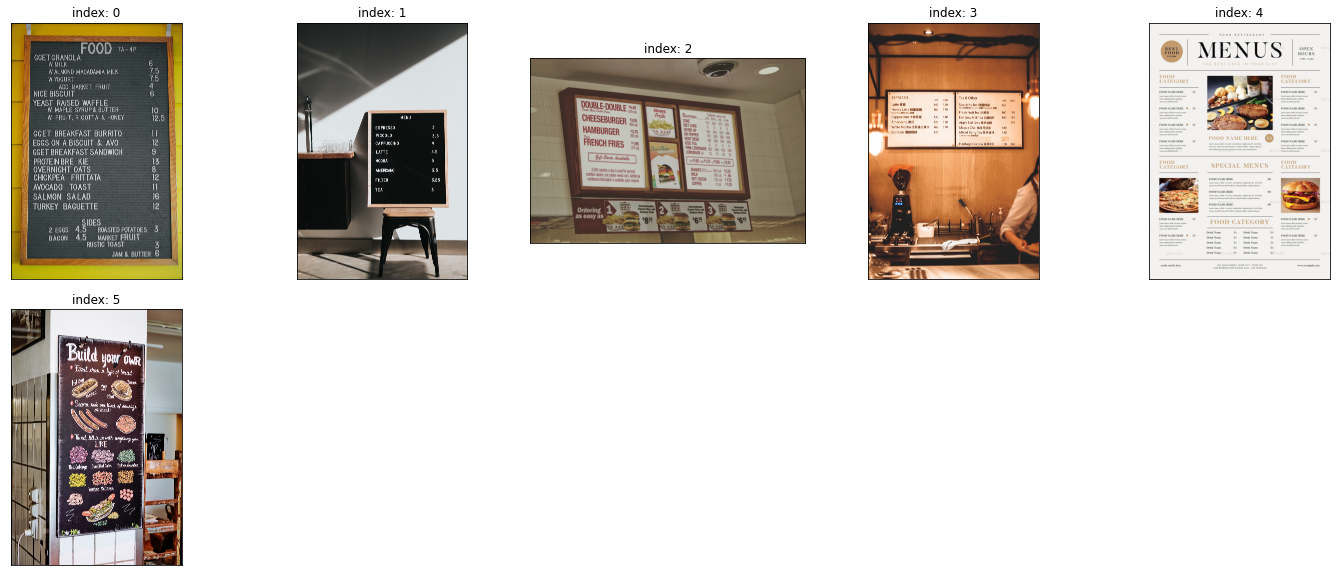

In [8]:
import cv2

plt.figure(figsize=(20, 20))

for i, img_path in enumerate(img_path_list):
    plt.subplot(5, 5, i+1)
    plt.title(f'index: {i}')

    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

    plt.tight_layout()

plt.show()

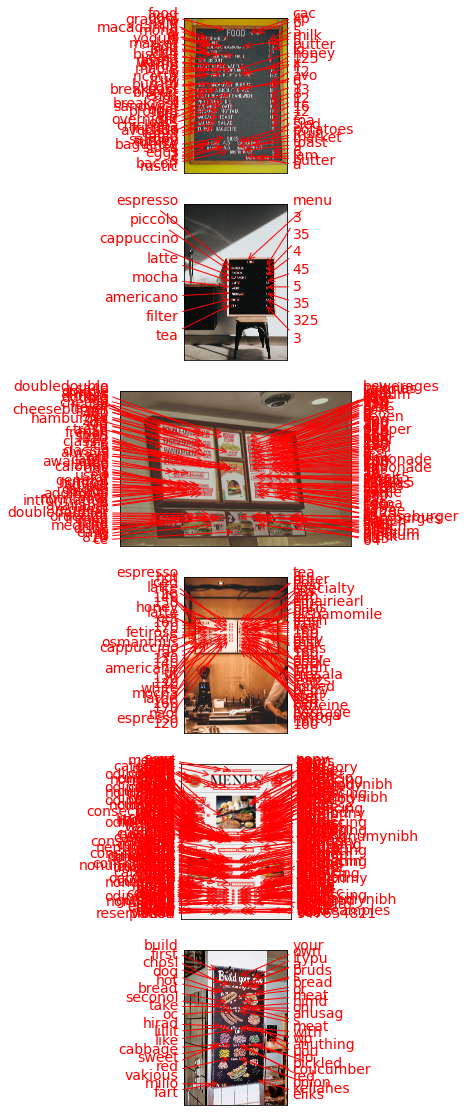

In [9]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [10]:
keras_ocr_dict = {}
for idx, img_path in enumerate(img_path_list):
  keras_ocr_dict[img_path] = prediction_groups[idx][0]

In [11]:
keras_ocr_dict

{'drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_2.jpg': [('food',
   array([[1837.5   ,  531.5625],
          [2657.8125,  531.5625],
          [2657.8125,  859.6875],
          [1837.5   ,  859.6875]], dtype=float32)),
  ('cac', array([[2808.75  ,  643.125 ],
          [3084.375 ,  643.125 ],
          [3084.375 ,  780.9375],
          [2808.75  ,  780.9375]], dtype=float32)),
  ('4p', array([[3104.0625,  643.125 ],
          [3294.375 ,  643.125 ],
          [3294.375 ,  780.9375],
          [3104.0625,  780.9375]], dtype=float32)),
  ('gget', array([[ 603.75  ,  833.4375],
          [1050.    ,  833.4375],
          [1050.    , 1023.75  ],
          [ 603.75  , 1023.75  ]], dtype=float32)),
  ('granola', array([[1056.5625,  846.5625],
          [1830.9375,  846.5625],
          [1830.9375, 1017.1875],
          [1056.5625, 1017.1875]], dtype=float32)),
  ('6', array([[3629.0625, 1017.1875],
          [3720.9375, 1017.1875],
          [3720.9375, 1161.5625],
         

- 단어의 좌표는 결과 보는데 방해가 되기 때문에 인덱스, 단어만 리스트에 따로 담아줌

In [12]:
keras_ocr_text_list = []
for idx, img_path in enumerate(img_path_list):
  keras_ocr_text_list.append([idx, list(zip(*keras_ocr_dict[img_path]))[0]])

In [13]:
keras_ocr_text_list

[[0,
  ('food',
   'cac',
   '4p',
   'gget',
   'granola',
   '6',
   'w',
   'milk',
   '',
   '5',
   'macadamia',
   'w',
   'al',
   'mond',
   'milk',
   '5',
   'yogurt',
   'w',
   'market',
   'add',
   'frult',
   'nice',
   'biscult',
   'yeast',
   'raised',
   'waffle',
   'syrup',
   'butter',
   'w',
   'maple',
   '8',
   'lo',
   'ricotta',
   'honey',
   'fruit',
   'x',
   '125',
   'w',
   'burrito',
   'gget',
   'breakeast',
   'll',
   '12',
   'biscuit',
   'avo',
   'eggs',
   'on',
   'c',
   'a',
   '9',
   'breakfast',
   'sandwich',
   'gget',
   'protein',
   'bre',
   'kie',
   '13',
   '8',
   'overnight',
   'oats',
   'chickpea',
   'frittata',
   '12',
   'avocado',
   'toast',
   'll',
   'salad',
   '16',
   'salmon',
   'turkey',
   'baguette',
   '12',
   'sides',
   '4',
   'z',
   'roa',
   'sied',
   'potatoes',
   'eggs',
   '2',
   'fruit',
   '4',
   '5',
   'market',
   'bacon',
   'toast',
   'rustic',
   '3',
   '6',
   'jam',
   'butter'

- 한글 인식 모델

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 512)         1180160   
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)              

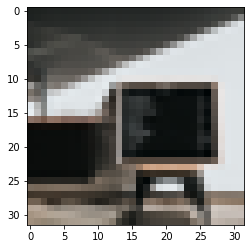

In [14]:

# -*- coding: utf-8 -*-
"""
Created on Thu May 28 16:48:33 2020
@author: 원기
"""
import numpy as np
import json
import matplotlib.pylab as plt
import sys
sys.path.append('/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/kor_model/')
from PIL import Image
from keras import models, layers

def test_Image(addr,table):
    T_Image = Image.open(addr)
    T_Image = T_Image.resize((32,32))
    T_Image_Array = np.array(T_Image,'uint8')
    plt.imshow(T_Image_Array)
    T_Image_Array = T_Image_Array.reshape(1,32,32,3)
    a = CNN.predict(T_Image_Array)
    b = np.argmax(a,axis=1)
    print('예측한 음절: ',table[str(b[0])])

CNN = models.load_model('/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/kor_model/Korean_CNN_model(97.8).h5')
with open('/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/kor_model/index_to_syllable(97.8).json','r',encoding='utf-8') as f:
    index_to_syllable = json.load(f)
CNN.summary()

T_Image_1_addr = '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_1.jpg'
test_Image(T_Image_1_addr,index_to_syllable)

예측한 음절:  쩽


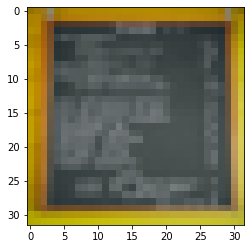

In [15]:
T_Image_2_addr = '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_2.jpg'
test_Image(T_Image_2_addr,index_to_syllable)

keras-ocr 한글 인식하는 모델이 있다고 해서 가져와봤는데 이게 한글 손글씨를 인식하는 모델이어서 이미지를 주면 예상되는 문자 하나를 줘서 예상과는 다른 결과가 나옴

### 태서랙트 써보기

In [16]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!sudo apt install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kor is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [18]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img'
img_file_path ='/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_1.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0000.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0001.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0002.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0003.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0004.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0005.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0006.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0007.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0008.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0009.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0010.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0

In [19]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    text_list=[]
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        text = recognized_data['text']
        print(text)
        text_list.append(text)
    print("Done")


# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

a ” , - . =F == ae

3

ol fa Beet 00

6) a Bate —

Ba a


AMERICANO a .

FILTER Was poe


_—

ay ai

ESSO

PICCOLO

7a Le

WNGas

MOCHA

Vs

Oe

mame.

now,

Done


한 줄씩 출력하는 게 불편해서 그냥 리스트에 넣고 리스트로 바로 출력하게 바꿔줌

## Step3. 테스트 결과 정리

file name : menu_2.jpg 에 대해서 keras ocr, 태서렉트 두 개의 결과를 비교

- keras ocr

In [20]:
keras_ocr_text_list[0]

[0,
 ('food',
  'cac',
  '4p',
  'gget',
  'granola',
  '6',
  'w',
  'milk',
  '',
  '5',
  'macadamia',
  'w',
  'al',
  'mond',
  'milk',
  '5',
  'yogurt',
  'w',
  'market',
  'add',
  'frult',
  'nice',
  'biscult',
  'yeast',
  'raised',
  'waffle',
  'syrup',
  'butter',
  'w',
  'maple',
  '8',
  'lo',
  'ricotta',
  'honey',
  'fruit',
  'x',
  '125',
  'w',
  'burrito',
  'gget',
  'breakeast',
  'll',
  '12',
  'biscuit',
  'avo',
  'eggs',
  'on',
  'c',
  'a',
  '9',
  'breakfast',
  'sandwich',
  'gget',
  'protein',
  'bre',
  'kie',
  '13',
  '8',
  'overnight',
  'oats',
  'chickpea',
  'frittata',
  '12',
  'avocado',
  'toast',
  'll',
  'salad',
  '16',
  'salmon',
  'turkey',
  'baguette',
  '12',
  'sides',
  '4',
  'z',
  'roa',
  'sied',
  'potatoes',
  'eggs',
  '2',
  'fruit',
  '4',
  '5',
  'market',
  'bacon',
  'toast',
  'rustic',
  '3',
  '6',
  'jam',
  'butter',
  'a')]

- tesseract

In [21]:
work_dir = '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2'
img_file_path ='/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/menu_2.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list_2 = crop_word_regions(img_file_path, work_dir)

/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0000.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0001.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0002.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0003.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0004.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0005.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0006.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0007.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0008.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0009.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img_2/0010.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽느

In [22]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    text_list=[]
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        text_list.append(recognized_data['text'].strip())
    print(text_list)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list_2)

['4', 'OOD', 'lq eo', 'GGET', 'GRANOLA', 'Rie', 'a', 'MY', 'ALMOND', 'MACADAMIA', 'ile', 'Vols', 'MY', 'YOGURT', 'is', 'ADD', 'MARKET', 'Bua', '4', 'NICE', 'DI SiCLel aE', 'ie', 'YEAST', 'RAISED', 'AS', 'TT', 'MAPLE', 'SYRUP &', 'BUTTER', 't@:', 'W FRUIT', ', RICOTTA', '& HONEY', 'Vase', 'CGGET', 'BREAKFAST', 'Pea Ae', '1]', 'EGGS', 'ON', '', 'piesa', '', 'AVO', 'I2', 'GGET', 'BRE AKFAST', 'TaN LA', '9', 'PROTEIN', 'BR', 'aq', '', '14', 'OVERNIGHT', 'OATS', 'Sones 3', 'Os Ge awl', 'Sha e.a7.', '12', '>? = =', 'AVOCADO', 'TOAST', '', 'ia', '\\', 'SALMON', 'SALAD', '=', 'te', 'i', 'DAUR Ged', 'BAGUETTE', '4', 'hy', 'as', '', 'V4', 'EGGS', 'Pe:', 'OLA', 'POTATOES', 'r', '', 'BACON', '45', 'MARKET', 'sa eial', 'RUSTIC', 'sey Wot', 'R', 'eT', '', '', '3']



## Step4. 결과 분석과 결론 제시

ocr을 통해 식당 메뉴판에 적힌 메뉴를 읽어줘서 시각 장애인이 혼자 식당에 가서 주문을 할 수 있게 하는 모델을 서비스하기 위해 keras_ocr과 tesseract의 결과를 분석 해봄.  
각 모델의 text_list는 같은 이미지에서 나온 결과임 
<center>

| | keras_ocr | tesseract |
|:---:|:---:|:---:|
| text_list |('food','cac','4p','gget','granola','6','w',<br>'milk','','5','macadamia','w','al','mond',<br>'milk','5','yogurt','w','market','add','frult',<br>'nice','biscult','yeast','raised','waffle','syrup','butter',<br>'w','maple','8','lo','ricotta','honey','fruit',<br>'x','125','w','burrito','gget','breakeast','ll',<br>'12','biscuit','avo','eggs','on','c','a',<br>'9','breakfast','sandwich','gget','protein','bre','kie',<br>'13','8','overnight','oats','chickpea','frittata','12',<br>'avocado','toast','ll','salad','16','salmon','turkey',<br>'baguette','12','sides','4','z','roa','sied',<br>'potatoes','eggs','2','fruit','4','5','market',<br>'bacon','toast','rustic','3','6','jam','butter','a')] | '4', 'OOD', 'lq eo', 'GGET', 'GRANOLA', 'Rie', 'a', <br>'MY', 'ALMOND', 'MACADAMIA', 'ile', 'Vols', 'MY', 'YOGURT', <br>'is', 'ADD', 'MARKET', 'Bua', '4', 'NICE', 'DI SiCLel aE',<br> 'ie', 'YEAST', 'RAISED', 'AS', 'TT', 'MAPLE', 'SYRUP &',<br> 'BUTTER', 't@:', 'W FRUIT', ', RICOTTA', '& HONEY', 'Vase', <br>'CGGET', 'BREAKFAST', 'Pea Ae', '1', 'EGGS', 'ON', '',<br> 'piesa', '', 'AVO', 'I2', 'GGET', 'BRE AKFAST',<br> 'TaN LA', '9', 'PROTEIN', 'BR', 'aq', '', '14',<br> 'OVERNIGHT', 'OATS', 'Sones 3', 'Os Ge awl', 'Sha e.a7.', '12', '>? = =',<br> 'AVOCADO', 'TOAST', '', 'ia', '\\', 'SALMON', 'SALAD', <br>'=', 'te', 'i', 'DAUR Ged', 'BAGUETTE', '4', 'hy',<br> 'as', '', 'V4', 'EGGS', 'Pe:', 'OLA', 'POTATOES',<br> 'r', '', 'BACON', '45', 'MARKET', 'sa eial', 'RUSTIC', <br>'sey Wot', 'R', 'eT', '', '', '3']|

</center>

솔직히 두 모델 모두 마음에 들 정도의 결과를 도출하지는 못함. 중간중간 이상한 단어가 들어가있는 모습을 볼 수 있음. 하지만 tesseract는 만약 시각장애인에게 메뉴를 읽어주기 위해 사용한다고 하면 특수문자 ('<','>','?','.')같은 것들은 있어서는 안될 것 같은데 특수문자 까지 전부 뽑아내버림.

하지만 메뉴판에 있는 메뉴들을 알맞게 뽑아냈는지에 대한것을 기준으로 둔다면 keras_ocr이 맞는 것 같음. 중간 중간 쓸모없는 단어도 있지만 waffle, sandwich, baguette, avocado같이 중요한 단어들은 확실하게 뽑아낸 것을 볼 수 있음.  
그에 비해 tesseract는 keras_ocr에선 뽑아냈지만 뽑아내지 못하는 단어가 있기 때문에 적합하지 않음.

회고
---

지금까지 숫자 인식, 스티커 붙이기, 이미지 분류를 진행하면서 이미지 하나를 그냥 클래스 하나로 분류하는 문제는 아주 준수하게 수행했기 때문에 조금만 있으면 컴퓨터가 화면에 보이는 단어들을 실시간으로 파악하고 번역까지 해주는 시대가 오겠구나~! 라는 생각을 했는데 이번 익스를 하면서 아직 갈 길이 멀구나... 하는 생각이 들었다.  
만약 이미지에 있는 문자들이 알맞은 사이즈와 알맞은 길이, 깔끔한 폰트 등으로 표현 되어있다면 분석을 잘 할 것 같다. 하지만 현실은 그렇게 잘 배열된 문자만 있는것이 아니기 때문에 고려해야할 변수들이 많아져서 인식이 쉽지 않은 것 같다.  
이런 다양한 문제들에 대한 성능을 향상시키는 과정을 내가 함께하는 상상을 해봤다. 너무 재밌을 것 같다 ㅋ_ㅋ 빨리 공부해서 합류 하겠습니다 슨배임들.